In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [21]:
from sklearn.datasets import load_breast_cancer

In [22]:
%matplotlib inline

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
cancer=load_breast_cancer()

In [25]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [26]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [27]:
features=pd.DataFrame(cancer.data,columns=cancer.feature_names)
target=pd.DataFrame(cancer.target,columns=['Target'])

In [28]:
df=pd.concat([features,target],axis=1)

In [29]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [30]:
correlation=df.corr('pearson')

In [31]:
correlation

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [32]:
correlation['Target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [33]:
x1=df['worst concave points']

In [34]:
x2=df['worst perimeter']

In [35]:
y=df['Target']

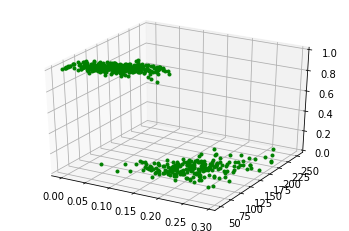

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1, x2, y, 'g.')

In [37]:
X1=np.array(x1)
X2=np.array(x2)
Y=np.array(y)

In [38]:
X1=(X1-X1.min())/(X1.max()-X1.min())
X2=(X2-X2.min())/(X2.max()-X2.min())

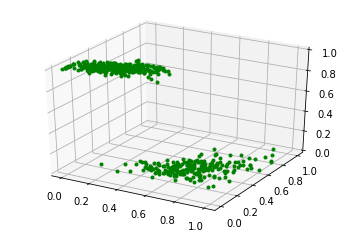

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, Y, 'g.')

In [41]:
X1_train,X1_test,X2_train,X2_test,Y_train,Y_test = train_test_split(X1,X2,Y,test_size=0.25)

In [42]:
X1_train.size

426

In [43]:
def hypothesis(a,b,c,x1,x2):
    return (1/(1+np.exp(-(a*x1+b*x2+c))))

In [50]:
def error(a,b,c,x1,x2,y):
    e=0
    m=len(x1)
    for i in range(m):
        e+=-(y[i]*np.log(hypothesis(a,b,c,x1[i],x2[i])))-((1-y[i])*np.log(1-hypothesis(a,b,c,x1[i],x2[i])))
        
    return (1/m)*e 

In [51]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    
    m=len(x1)
    
    for i in range(m):
        grad_a+=(hypothesis(a,b,c,x1[i],x2[i])-y[i])*x1[i]
        grad_b+=(hypothesis(a,b,c,x1[i],x2[i])-y[i])*x2[i]
        grad_c+=(hypothesis(a,b,c,x1[i],x2[i])-y[i])
        
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
    
    return a,b,c

In [52]:
def descend(init_a,init_b,init_c,x1,x2,y,learning_rate,iterations):
    a=init_a
    b=init_b
    c=init_c
    
    for i in range(iterations):
        e=error(a,b,c,x1,x2,y)
        
        if i % 1000==0:
            print(f"error: {e},a:{a},b:{b},c:{c}")
            
        a,b,c=step_gradient(a,b,c,x1,x2,y,learning_rate)
        
    return a,b,c

In [66]:
init_a=-10.32200787731277
init_b=-22.674527692698366
init_c=11.543405254883005
iterations=10000
learning_rate=0.001

In [67]:
final_a,final_b,final_c=descend(init_a,init_b,init_c,X1_train,X2_train,Y_train,learning_rate,iterations)

error: 0.1332003523701434,a:-10.32200787731277,b:-22.674527692698366,c:11.543405254883005
error: 0.13301231409104888,a:-10.476624388254022,b:-22.87366884416014,c:11.671461024193201
error: 0.1328637888128576,a:-10.599495929589379,b:-23.06288110861329,c:11.782296579321043
error: 0.13274309331156675,a:-10.697747292711764,b:-23.24261690328624,c:11.879256425344517
error: 0.13264274849665328,a:-10.776740149924535,b:-23.413313057158707,c:11.964885266048444
error: 0.13255780475538073,a:-10.840565294120509,b:-23.575394204136824,c:12.04115127288514
error: 0.13248487920966084,a:-10.892378232804173,b:-23.729273445265765,c:12.109597711941708
error: 0.13242158561934775,a:-10.934634467551492,b:-23.875351874587558,c:12.171448907290818
error: 0.1323661880908947,a:-10.969258343998439,b:-24.014017735245453,c:12.22768610110289
error: 0.13231738592278983,a:-10.997766624395657,b:-24.14564556773208,c:12.279102882293989


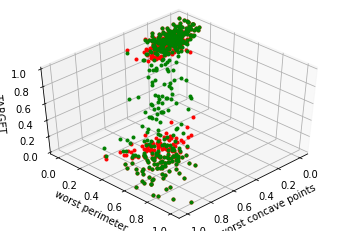

In [68]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.view_init(45,45)

ax.plot3D(X1_train,X2_train,Y_train,'r.')
ax.plot3D(X1_train,X2_train, hypothesis(init_a, init_b, init_c, X1_train, X2_train),'g.')
ax.set_xlabel("worst concave points")
ax.set_ylabel("worst perimeter")
ax.set_zlabel("TARGET")
plt.show()

In [69]:
error(final_a,final_b,final_c,X1_train,X2_train,Y_train)

0.1322741771175332

In [70]:
error(final_a,final_b,final_c,X1_test,X2_test,Y_test)

0.13467809900946895

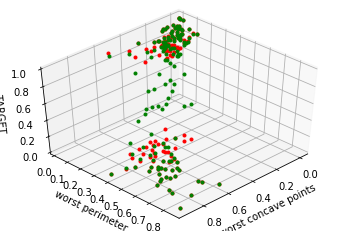

In [71]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.view_init(45,45)

ax.plot3D(X1_test,X2_test,Y_test,'r.')
ax.plot3D(X1_test,X2_test, hypothesis(init_a, init_b, init_c, X1_test, X2_test),'g.')
ax.set_xlabel("worst concave points")
ax.set_ylabel("worst perimeter")
ax.set_zlabel("TARGET")
plt.show()

In [75]:
def accuracy(a,b,c,x1,x2,y):
    correct=0
    m=len(x1)
    
    for i in range(m):
        pred=hypothesis(a,b,c,x1[i],x2[i])
        
        if pred > 0.5:
            z=1
        else:
            z=0
            
        if y[i]==z:
            correct+=1
            
    print(f"Accuracy:{correct/len(y)}")

In [76]:
accuracy(final_a,final_b,final_c,X1_train,X2_train,Y_train)

Accuracy:0.9460093896713615
